In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


GPU OR CPU

In [ ]:
# !pip install paddlepaddle paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 90.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=7d3ade9b1d57e9377923860f1c53429d72df1b43e25889d938a7bec51875099f
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
  Attempting uninstall: opt_einsum
    Found e

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [3]:
!nvidia-smi

Thu May  8 12:19:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   37C    P8             11W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
# Uninstall any existing paddlepaddle and paddleocr versions first to avoid conflicts
!pip uninstall paddlepaddle paddlepaddle-gpu paddleocr

# Option 1: Try with PaddlePaddle 2.1.2 for CUDA 9.0
# !pip install paddlepaddle-gpu==2.1.2.post90 -f https://paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

# If the above fails to find the package (it might be too old to be on the default stable channel for that URL)
# you might need to hunt for older .whl files.
# A more general command for older versions might have looked like (but the URL structure has changed over time):
!pip install paddlepaddle-gpu==2.1.2.post90 -i https://pypi.tuna.tsinghua.edu.cn/simple
# or checking historical releases on PyPI directly for 'paddlepaddle-gpu'.

# Once paddlepaddle-gpu is successfully installed:
!pip install paddleocr==2.1.0

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
ERROR: Could not find a version that satisfies the requirement paddlepaddle-gpu==2.1.2.post90 (from versions: 2.5.1, 2.5.2, 2.6.0, 2.6.1, 2.6.2)
ERROR: No matching distribution found for paddlepaddle-gpu==2.1.2.post90
ERROR: Ignored the following yanked versions: 2.7.4, 2.7.5
ERROR: Could not find a version that satisfies the requirement paddleocr==2.1.0 (from versions: 0.0.1.1, 0.0.2, 0.0.3, 0.0.3.1, 1.0.0, 1.0.1, 1.1.1, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.2, 2.2.0.1, 2.2.0.2, 2.3, 2.3.0.1, 2.3.0.2, 2.4, 2.4.0.1, 2.4.0.2, 2.4.0.3, 2.4.0.4, 2.5, 2.5.0.2, 2.5.0.3, 2.6, 2.6.0.1, 2.6.0.2, 2.6.0.3, 2.6.1.0, 2.6.1.1, 2.6.1.2, 2.6.1.3, 2.7.0.0, 2.7.0.1, 2.7.0.2, 2.7.0.3, 2.7.2, 2.7.3, 2.8.0, 2.8.1, 2.9.0, 2.9.1, 2.10.0)
ERROR: No matching distribution found for paddleocr==2.1.0


In [1]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1

--2025-05-08 12:13:49--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 23.52.40.35, 23.52.40.33, 23.52.40.19
Connecting to developer.nvidia.com (developer.nvidia.com)|23.52.40.35|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://developer.nvidia.com/downloads/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb [following]
--2025-05-08 12:13:49--  https://developer.nvidia.com/downloads/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?__token__=exp=1746707030~hmac=5cd85e90042

In [3]:
!export PATH=/usr/local/cuda-9.0/bin:$PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-9.0/lib64:$LD_LIBRARY_PATH
!export CUDA_HOME=/usr/local/cuda-9.0


In [5]:
!sudo apt-get remove --purge cuda


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-9-0 cuda-command-line-tools-9-0 cuda-core-9-0 cuda-cublas-9-0
  cuda-cublas-dev-9-0 cuda-cudart-9-0 cuda-cudart-dev-9-0 cuda-cufft-9-0
  cuda-cufft-dev-9-0 cuda-curand-9-0 cuda-curand-dev-9-0 cuda-cusolver-9-0
  cuda-cusolver-dev-9-0 cuda-cusparse-9-0 cuda-cusparse-dev-9-0
  cuda-demo-suite-9-0 cuda-documentation-9-0 cuda-driver-dev-9-0 cuda-drivers
  cuda-drivers-575 cuda-libraries-9-0 cuda-libraries-dev-9-0 cuda-license-9-0
  cuda-misc-headers-9-0 cuda-npp-9-0 cuda-npp-dev-9-0 cuda-nvgraph-9-0
  cuda-nvgraph-dev-9-0 cuda-nvml-dev-9-0 cuda-nvrtc-9-0 cuda-nvrtc-dev-9-0
  cuda-runtime-9-0 cuda-samples-9-0 cuda-toolkit-9-0 cuda-visual-tools-9-0
  dctrl-tools default-jre dkms fonts-dejavu-extra freeglut3 freeglut3-dev
  keyboard-configuration libatk-wrapper-java libatk-wrapper-java-jni
  libgail-common libga

In [6]:
!nvidia-smi

Thu May  8 10:00:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   29C    P0             43W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [3]:
# 1. Upgrade pip (recommended)
!pip install --upgrade pip

# 2. Install paddlepaddle-gpu for CUDA 12.3 (works with Colab CUDA 12.4)
!pip install paddlepaddle-gpu==2.6.2 -f https://www.paddlepaddle.org.cn/whl/cu123

# 3. Install PaddleOCR
!pip install "paddleocr>=2.8.1"


Looking in links: https://www.paddlepaddle.org.cn/whl/cu123
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 759.0/759.0 MB 36.1 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [paddlepaddle-gpu]


In [5]:
import paddle

# Basic version check
print("Paddle version:", paddle.__version__)
print("Compiled with CUDA:", paddle.device.is_compiled_with_cuda())

# Try to use GPU
if paddle.device.is_compiled_with_cuda():
    try:
        # Corrected way to create a tensor on GPU
        x = paddle.ones([2, 3], dtype='float32', place=paddle.CUDAPlace(0))
        print("Tensor created on GPU:", x.place)
    except Exception as e:
        print("Failed to run on GPU:", e)
else:
    print("CUDA is not available.")


Paddle version: 2.6.1
Compiled with CUDA: True
Failed to run on GPU: ones() got an unexpected keyword argument 'place'


In [6]:
import paddle
print(paddle.is_compiled_with_cuda())
print(paddle.device.get_device())


True
gpu:0


In [7]:
from paddleocr import PaddleOCR
import logging
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from PIL import Image

In [8]:
logger = logging.getLogger('ppocr')
logger.setLevel(logging.INFO)

GPU OR CPU

In [11]:
# Cell 5: Initialize PaddleOCR (This downloads the *pre-trained* models)
#User's original initialization
ocr = PaddleOCR(
    use_angle_cls = True,
    lang = 'en',
    use_gpu = False # Set to True for GPU if available and you want to use it
)
#eep this as a reference for the base model performance.
#We'll initialize a *new* OCR object with the fine-tuned model later.
print("Initializing base PaddleOCR model...")
#Consider using GPU for faster inference if available
ocr_base = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=False)
print("Base model initialization complete.")

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:00<00:00, 4810.90it/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:00<00:00, 10386.28it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:02<00:00, 1042.97it/s]


Initializing base PaddleOCR model...
Base model initialization complete.


In [9]:
# Cell 5: Initialize PaddleOCR (This downloads the *pre-trained* models)
#User's original initialization
ocr = PaddleOCR(
    use_angle_cls = True,
    lang = 'en',
    use_gpu = True # Set to True for GPU if available and you want to use it
)
#eep this as a reference for the base model performance.
#We'll initialize a *new* OCR object with the fine-tuned model later.
print("Initializing base PaddleOCR model...")
#Consider using GPU for faster inference if available
ocr_base = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=True)
print("Base model initialization complete.")

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:00<00:00, 5195.55it/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:00<00:00, 11513.42it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:00<00:00, 3079.91it/s]

[2025/05/08 11:42:37] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0


[2025/05/08 11:42:38] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2025/05/08 11:42:39] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
Initializing base PaddleOCR model...
[2025/05/08 11:42:40] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2025/05/08 11:42:41] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2025/05/08 11:42:42] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
Base model initialization complete.


In [ ]:
# Cell 6-14: User's single image inference (Optional, can keep or remove)
# Keep for comparison if desired
# img_path_single = '/content/drive/MyDrive/OCR/Copy of.car_plate.jpg'
# img_path = '/content/drive/MyDrive/OCR/' # This seems to be a directory in your original code, likely meant to be a file path.
# result = ocr.ocr(img_path, cls = True) # This will fail if img_path is a directory

# # Assuming testset is actually a single image path for the original code's intent
# # Let's use an example path from your multi-image cell

# try:
#     print(f"Testing base model on single image: {img_path_single}")
#     result_base_single = ocr_base.ocr(img_path_single, cls=True)
#     if result_base_single and result_base_single[0]:
#         for line in result_base_single[0]:
#             coordinates = line[0]
#             text = line[1][0]
#             confidence = line[1][1]
#             print(f"Base Model (Single Image) position: {coordinates} | text:{text} | confidence:{confidence:.2f}")
#     else:
#          print("Base Model (Single Image): No text detected.")
# except Exception as e:
#     print(f"Error running base model on single image: {e}")


Testing base model on multiple images:
Processing image with base model: /content/drive/MyDrive/OCR/test/20250307-182531_01_frame96_plate0.jpg


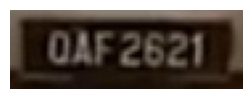

Base Model (Multi Image): No text detected in the image.
--------------------
Processing image with base model: /content/drive/MyDrive/OCR/test/20250308-191905_01_frame89_plate0.jpg


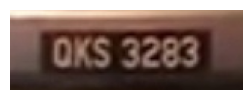

Base Model (Multi Image): No text detected in the image.
--------------------
Processing image with base model: /content/drive/MyDrive/OCR/test/20250308-191905_01_frame321_plate0.jpg


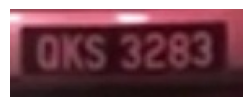

Base Model (Multi Image): No text detected in the image.
--------------------
Processing image with base model: /content/drive/MyDrive/OCR/test/IMG_8317_01_frame251_plate0.jpg


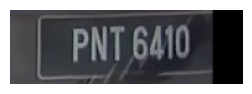

Base Model (Multi Image): No text detected in the image.
--------------------
Processing image with base model: /content/drive/MyDrive/OCR/test/IMG_8317_01_frame312_plate0.jpg


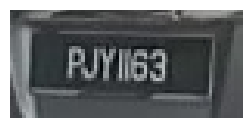

Base Model (Multi Image): No text detected in the image.
--------------------
Processing image with base model: /content/drive/MyDrive/OCR/test/NO20250302-052601-041216F_01_frame12_plate0.jpg


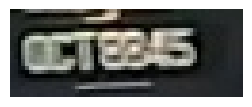

Base Model (Multi Image): No text detected in the image.
--------------------
Processing image with base model: /content/drive/MyDrive/OCR/test/NO20250302-052601-041216F_01_frame87_plate0.jpg


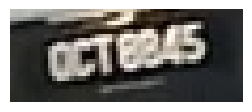

Base Model (Multi Image): No text detected in the image.
--------------------
Processing image with base model: /content/drive/MyDrive/OCR/test/NO20250302-052601-041216F_01_frame330_plate0.jpg


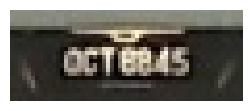

Base Model (Multi Image): No text detected in the image.
--------------------


In [10]:
# Cell 15-18: User's multi-image inference (Optional, can keep or remove)
# Keep for comparison if desired
print("\nTesting base model on multiple images:")
img_dir_multi = '/content/drive/MyDrive/OCR/test'
image_files_multi = [os.path.join(img_dir_multi, f) for f in os.listdir(img_dir_multi) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for image_file in image_files_multi:
    print(f"Processing image with base model: {image_file}")
    try:
        result_base_multi = ocr_base.ocr(image_file, cls=True)
        image = Image.open(image_file).convert('RGB')

        # Show the original image (can be slow for many images)
        plt.figure(figsize=(3, 3))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        if result_base_multi and result_base_multi[0]:
            for line in result_base_multi[0]:
                coordinates = line[0]
                text = line[1][0]
                confidence = line[1][1]
                print(f"Base Model (Multi Image) Position: {coordinates} | Text: {text} | Confidence: {confidence:.2f}")
        else:
            print("Base Model (Multi Image): No text detected in the image.")
        print("-" * 20)
    except Exception as e:
        print(f"Error processing image {image_file} with base model: {e}")

finetuning

In [11]:
# Cell 19: Clone the PaddleOCR repository
# This is needed to get the training scripts and configuration files
print("Cloning PaddleOCR repository...")
!git clone https://github.com/PaddlePaddle/PaddleOCR.git
print("Cloning complete.")

# Cell 20: Install dependencies required by the PaddleOCR repo for training
# Navigate into the cloned directory to install its specific requirements
print("Installing PaddleOCR repository requirements...")
%cd PaddleOCR
!pip install -r requirements.txt

print("Repository requirements installed.")
# Navigate back to the content directory
%cd ../

Cloning PaddleOCR repository...
Cloning into 'PaddleOCR'...
remote: Enumerating objects: 151056, done.
remote: Counting objects: 100% (2283/2283), done.
remote: Compressing objects: 100% (431/431), done.
remote: Total 151056 (delta 1912), reused 2170 (delta 1852), pack-reused 148773 (from 3)
Receiving objects: 100% (151056/151056), 872.71 MiB | 16.19 MiB/s, done.
Resolving deltas: 100% (118446/118446), done.
Cloning complete.
Installing PaddleOCR repository requirements...
/content/PaddleOCR
Repository requirements installed.
/content


In [12]:
# Cell 21: Prepare your custom dataset

# Replace with the actual path to your dataset on Google Drive
YOUR_DATASET_ROOT = '/content/drive/MyDrive/OCR/'
YOUR_TRAIN_IMAGE_DIR = os.path.join(YOUR_DATASET_ROOT, 'trainingset/images')
# YOUR_VAL_IMAGE_DIR = os.path.join(YOUR_DATASET_ROOT, 'val_images')
YOUR_TRAIN_LABEL_FILE = os.path.join(YOUR_DATASET_ROOT, 'trainingset/train.txt')
# YOUR_VAL_LABEL_FILE = os.path.join(YOUR_DATASET_ROOT, 'rec_gt_val.txt')

# Ensure your label files are in the format: relative/path/to/image.jpg\ttext_label\n
# The relative path is from YOUR_TRAIN_IMAGE_DIR or YOUR_VAL_IMAGE_DIR

print(f"Assuming your dataset is located at: {YOUR_DATASET_ROOT}")
print(f"Training images expected at: {YOUR_TRAIN_IMAGE_DIR}")
# print(f"Validation images expected at: {YOUR_VAL_IMAGE_DIR}")
print(f"Training labels expected at: {YOUR_TRAIN_LABEL_FILE}")
# print(f"Validation labels expected at: {YOUR_VAL_LABEL_FILE}")


Assuming your dataset is located at: /content/drive/MyDrive/OCR/
Training images expected at: /content/drive/MyDrive/OCR/trainingset/images
Training labels expected at: /content/drive/MyDrive/OCR/trainingset/train.txt


COPY CONFIG TO REPLACE MY CONFIG
RUN ONLY ONE TIME!!!!

In [13]:

# Cell 22: Prepare the configuration file for fine-tuning
# The base config depends on which pre-trained model you want to fine-tune.


# Path to the base config file within the cloned repo
BASE_CONFIG_PATH = '/content/PaddleOCR/configs/rec/PP-OCRv3/en_PP-OCRv3_mobile_rec.yml'
# Name for your modified config file
FINETUNE_CONFIG_NAME = '/content/drive/MyDrive/OCR/my_finetune_rec_config.yml'
# Path where the finetuned model will be saved on Drive
SAVE_MODEL_DIR = '/content/drive/MyDrive/OCR/PaddleOCR_FineTuned_Rec'

# Copy the base config
# !cp {BASE_CONFIG_PATH} {FINETUNE_CONFIG_NAME}

# Now, modify the copied config file. You need to edit this file.
# Open the 'my_finetune_rec_config.yml' file in Colab's file browser
# (or download it, edit, and re-upload).
#
# --- Key changes to make in my_finetune_rec_config.yml ---
# 1. Set the paths to your dataset:
#    Look for sections like 'Train' and 'Eval'.
#    Inside 'dataset', find 'data_dir' and 'label_file_list'.
#    Change 'data_dir' to: {YOUR_TRAIN_IMAGE_DIR} for Train, {YOUR_VAL_IMAGE_DIR} for Eval.
#    Change 'label_file_list' to: [{YOUR_TRAIN_LABEL_FILE}] for Train, [{YOUR_VAL_LABEL_FILE}] for Eval.
#
# 2. Point to the pre-trained weights for fine-tuning:
#    Look for 'Global' section, find 'pretrained_model'.
#    This should point to the *recognition* weights of the pre-trained model.
#    When you initialize PaddleOCR with lang='en', it downloads models. The recognition part for PP-OCRv4 English is usually saved somewhere like:
#    /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.pdparams
#    or a similar path ending in `.pdparams`. You need to find the *exact* path Colab saved it to.
#    *Tip: Look at the output when you first initialized PaddleOCR with lang='en'. It shows download paths.*
#    If you can't find the .pdparams training weights, you might need to download them separately from the PaddleOCR release page, or fine-tuning directly from inference weights might be possible but sometimes requires slightly different config settings or model loading logic within the script. The `.pdparams` file is generally preferred for fine-tuning.
#    *Alternative:* PaddleOCR configs often come with a default `pretrained_model` URL/path commented out. If the pre-trained model was successfully downloaded, you can likely uncomment/set this path directly to the downloaded .pdparams file.
#    Example change:
#    Global:
#      # ... other settings ...
#      pretrained_model: /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.pdparams # <--- Replace with actual path/URL
#
# 3. Adjust learning rate:
#    For fine-tuning, the learning rate is typically smaller than for training from scratch.
#    Look for the 'Optimizer' section. You'll find 'lr'. Reduce it (e.g., divide by 10 or 100).
#    Example change:
#    Optimizer:
#      lr:
#        learning_rate: 0.0001 # Reduced from a larger value
#
# 4. Set the save directory:
#    In the 'Global' section, find 'save_model_dir'.
#    Change it to the desired path on your Google Drive: {SAVE_MODEL_DIR}
#    Example change:
#    Global:
#      # ... other settings ...
#      save_model_dir: {SAVE_MODEL_DIR}
#
# 5. Set epochs:
#    In the 'Global' section, find 'epoch_num' or 'epochs'.
#    Set the number of epochs you want to train for. Fine-tuning usually requires fewer epochs than training from scratch (e.g., 100-500 depending on dataset size).
#    Example change:
#    Global:
#      # ... other settings ...
#      epoch_num: 200 # Train for 200 epochs
#
# 6. (Optional but Recommended) Adjust character dictionary:
#    Look for 'PostProcess.rec_char_dict_path' and 'Architecture.Head.out_channels'.
#    The default dictionary has characters for the base model's language.
#    If your license plates have characters *not* in the English dictionary (e.g., specific symbols, non-ASCII characters), you'll need to:
#    a) Create a new dictionary file listing all unique characters in your dataset (one character per line).
#    b) Update 'rec_char_dict_path' in the config to point to this new dictionary file.
#    c) Update 'Architecture.Head.out_channels' to the number of characters in your new dictionary + 2 (for CTC blank and unknown).
#    For standard alphanumeric plates, the default English dict might be sufficient, but double-check your data.
#
# --- End of Key Changes ---
#
# After making these changes, save the 'my_finetune_rec_config.yml' file.

print(f"Configuration file copied to {FINETUNE_CONFIG_NAME}. Please edit it to configure paths and parameters.")
print(f"Fine-tuned model will be saved to: {SAVE_MODEL_DIR}")
print("Please ensure your dataset is correctly formatted and paths in the config are correct.")


Configuration file copied to /content/drive/MyDrive/OCR/my_finetune_rec_config.yml. Please edit it to configure paths and parameters.
Fine-tuned model will be saved to: /content/drive/MyDrive/OCR/PaddleOCR_FineTuned_Rec
Please ensure your dataset is correctly formatted and paths in the config are correct.


In [14]:
print(FINETUNE_CONFIG_NAME)
!cat /content/drive/MyDrive/OCR/my_finetune_rec_config.yml

/content/drive/MyDrive/OCR/my_finetune_rec_config.yml
Global:
  model_name: en_PP-OCRv3_mobile_rec  # To use static model for inference.
  debug: false
  use_gpu: false
  epoch_num: 10 #testing
  log_smooth_window: 20
  print_batch_step: 10
  save_model_dir: /content/drive/MyDrive/OCR
  save_epoch_step: 3
  eval_batch_step: [0, 1000]
  cal_metric_during_train: true
  pretrained_model:
  checkpoints:
  save_inference_dir:
  use_visualdl: false
  infer_img: doc/imgs_words/ch/word_1.jpg
  character_dict_path: /content/drive/MyDrive/OCR/plate_dict.txt
  max_text_length: &max_text_length 25
  infer_mode: false
  use_space_char: true
  distributed: true
  save_res_path: ./output/rec/predicts_ppocrv3_en.txt


Optimizer:
  name: Adam
  beta1: 0.9
  beta2: 0.999
  lr:
    name: Cosine
    learning_rate: 0.001
    warmup_epoch: 5
  regularizer:
    name: L2
    factor: 3.0e-05


Architecture:
  model_type: rec
  algorithm: SVTR_LCNet
  Transform:
  Backbone:
    name: MobileNetV1Enhance
    scal

In [15]:
# Cell 23: Run the fine-tuning process
%cd /content/PaddleOCR/
!python tools/train.py -c {FINETUNE_CONFIG_NAME}
# %cd /content/ # Optional: return to the original directory

/content/PaddleOCR
[2025/05/08 11:44:51] ppocr WARNING: Skipping import of the encryption module.
[2025/05/08 11:44:52] ppocr INFO: Architecture : 
[2025/05/08 11:44:52] ppocr INFO:     Backbone : 
[2025/05/08 11:44:52] ppocr INFO:         last_conv_stride : [1, 2]
[2025/05/08 11:44:52] ppocr INFO:         last_pool_kernel_size : [2, 2]
[2025/05/08 11:44:52] ppocr INFO:         last_pool_type : avg
[2025/05/08 11:44:52] ppocr INFO:         name : MobileNetV1Enhance
[2025/05/08 11:44:52] ppocr INFO:         scale : 0.5
[2025/05/08 11:44:52] ppocr INFO:     Head : 
[2025/05/08 11:44:52] ppocr INFO:         head_list : 
[2025/05/08 11:44:52] ppocr INFO:             CTCHead : 
[2025/05/08 11:44:52] ppocr INFO:                 Head : 
[2025/05/08 11:44:52] ppocr INFO:                     fc_decay : 1e-05
[2025/05/08 11:44:52] ppocr INFO:                 Neck : 
[2025/05/08 11:44:52] ppocr INFO:                     depth : 2
[2025/05/08 11:44:52] ppocr INFO:                     dims : 64
[20

In [25]:
 !ls ./train_data or print("Running")

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `ls ./train_data or print("Running")'


In [26]:
# Cell 23: Run the training script

print("Starting fine-tuning training...")
# Navigate into the PaddleOCR directory to run the train script
%cd PaddleOCR
# Run the training script with your modified config file
# -c specifies the config file
# We override save_model_dir on the command line just to be extra sure it goes to Drive
!python3 tools/train.py -c ..{FINETUNE_CONFIG_NAME} -o Global.save_model_dir={SAVE_MODEL_DIR}

# Training output will appear below. Look for accuracy metrics.
# If training stops prematurely, check the error messages. Common issues are:
# - Incorrect paths in the config file.
# - Incorrect dataset format (label file not matching image paths).
# - Mismatch between character dictionary, dataset labels, and head output channels.
# - CUDA memory errors (if using GPU with too large batch size or images).

print("Training command executed. Monitor the output above.")

# Navigate back to the content directory after training (or if training failed)
%cd ../


Starting fine-tuning training...
/PaddleOCR
[2025/05/08 11:34:28] ppocr WARNING: Skipping import of the encryption module.
[2025/05/08 11:34:29] ppocr INFO: Architecture : 
[2025/05/08 11:34:29] ppocr INFO:     Backbone : 
[2025/05/08 11:34:29] ppocr INFO:         last_conv_stride : [1, 2]
[2025/05/08 11:34:29] ppocr INFO:         last_pool_kernel_size : [2, 2]
[2025/05/08 11:34:29] ppocr INFO:         last_pool_type : avg
[2025/05/08 11:34:29] ppocr INFO:         name : MobileNetV1Enhance
[2025/05/08 11:34:29] ppocr INFO:         scale : 0.5
[2025/05/08 11:34:29] ppocr INFO:     Head : 
[2025/05/08 11:34:29] ppocr INFO:         head_list : 
[2025/05/08 11:34:29] ppocr INFO:             CTCHead : 
[2025/05/08 11:34:29] ppocr INFO:                 Head : 
[2025/05/08 11:34:29] ppocr INFO:                     fc_decay : 1e-05
[2025/05/08 11:34:29] ppocr INFO:                 Neck : 
[2025/05/08 11:34:29] ppocr INFO:                     depth : 2
[2025/05/08 11:34:29] ppocr INFO:         

In [ ]:
# Cell 24: After training, inspect the saved model
# Inside SAVE_MODEL_DIR, you'll find directories like 'best_accuracy' and 'latest'.
# The 'best_accuracy' directory contains the model files (.pdiparams, .pdmodel)
# for the epoch with the highest validation accuracy.

print(f"Training results and model checkpoints are saved in: {SAVE_MODEL_DIR}")
print("Checking contents of the save directory...")
!ls {SAVE_MODEL_DIR}

# The final inference model files are typically found in SAVE_MODEL_DIR/best_accuracy
FINETUNED_INFERENCE_MODEL_DIR = os.path.join(SAVE_MODEL_DIR, 'best_accuracy')

print(f"Finetuned inference model is expected in: {FINETUNED_INFERENCE_MODEL_DIR}")
!ls {FINETUNED_INFERENCE_MODEL_DIR}
# You should see files like 'inference.pdiparams', 'inference.pdmodel', etc.

# Cell 25: Load and test the fine-tuned model
print("\nLoading the fine-tuned model for inference...")

# By specifying rec_model_dir, you override the default English recognition model.
ocr_finetuned = PaddleOCR(
    use_angle_cls=True, # Use the default angle classifier (or fine-tune it too if needed)
    lang='en', # Keep lang for the default detector (or fine-tune det too)
    use_gpu=False, # Use GPU for faster inference if available
    rec_model_dir=FINETUNED_INFERENCE_MODEL_DIR, # Path to your fine-tuned RECOGNITION model
    det_model_dir=None, # Use default English detector
    cls_model_dir=None # Use default angle classifier
)

print("Finetuned model initialized.")

# Test the fine-tuned model on an image from your dataset (preferably from the validation set)
# Use one of the image paths you used for validation/testing earlier
TEST_IMAGE_PATH_FOR_FINETUNE = '/content/drive/MyDrive/OCR/test/20250307-182531_01_frame96_plate0.jpg' # Replace with an image path from your dataset

print(f"\nTesting fine-tuned model on image: {TEST_IMAGE_PATH_FOR_FINETUNE}")
try:
    result_finetuned = ocr_finetuned.ocr(TEST_IMAGE_PATH_FOR_FINETUNE, cls=True)

    # Display the image
    image_test = Image.open(TEST_IMAGE_PATH_FOR_FINETUNE).convert('RGB')
    plt.figure(figsize=(5, 5))
    plt.imshow(image_test)
    plt.axis('off')
    plt.show()

    if result_finetuned and result_finetuned[0]:
        for line in result_finetuned[0]:
            coordinates = line[0]
            text = line[1][0]
            confidence = line[1][1]
            print(f"Finetuned Model Position: {coordinates} | Text: {text} | Confidence: {confidence:.2f}")
    else:
        print("Finetuned Model: No text detected in the image.")

except Exception as e:
    print(f"Error running fine-tuned model inference: {e}")
